<center>

    Basic Simulation Practice </h1>
  </center>
  
  ## Name : Thanoj Muddana



### Exercise 1: Performance of $k$ trimmed means

a) Estimate the MSE and variances of the level $k$ trimmed means for 1000 random samples of size 20 generated from a standard Cauchy distribution with center at 0.  Summarize the estimates of MSE and variances in a table for $k = 1, 2, ..., 9.$

**Hint.** As a test case for you to check you're on the right track, if you put in the code `set.seed(1)` before you do your random Cauchy samples, you should get results like this table (first column is MSE, second is Var):

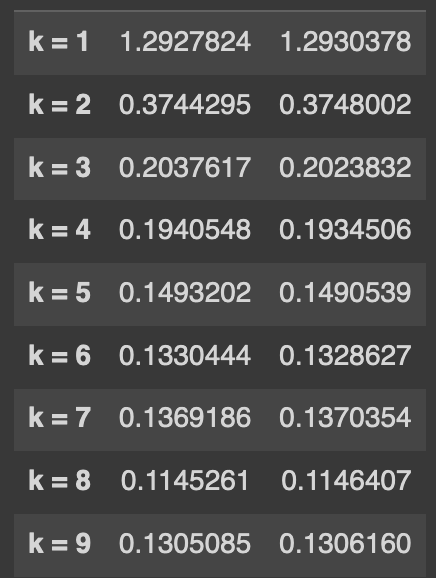

b) **Write Up Only**: Then answer, what does the simulation tell you about how the different k-level trimmed means perform for this setting? As part of your answer, answer what levels of $k$ seem to do best.
    

In [ ]:
set.seed(1)
#Simulation Settings
simulations=1000
sample_size=20
k_trims=9
k_trimmed_mse <- rep(NA,k_trims)
K_trimmed_variances <- rep(NA,k_trims)

# for each k trimmed mean
for(k in 1:k_trims){
    trimmed_means <- rep(NA,simulations)
    for(simulation in 1:simulations){
        #generate sample
        sample <- rcauchy(sample_size)
        sample <- sort(sample)
        #k-trim
        trimmed_sample <- sample[(k+1):(sample_size-k)]
        trimmed_means[simulation] <- mean(trimmed_sample)
    }
    k_trimmed_mse[k]=mean((trimmed_means-0)^2)
    K_trimmed_variances[k]= var(trimmed_means)
}

results <- data.frame(k=1:9,MSE=k_trimmed_mse,Variance=K_trimmed_variances)
print(results)

  k       MSE  Variance
1 1 1.2927824 1.2930378
2 2 0.3744295 0.3748002
3 3 0.2037617 0.2023832
4 4 0.1940548 0.1934506
5 5 0.1493202 0.1490539
6 6 0.1330444 0.1328627
7 7 0.1369186 0.1370354
8 8 0.1145261 0.1146407
9 9 0.1305085 0.1306160


Lower MSE is better, estimated value is closer to the actual value. With increase in K (trims), MSE is decreasing and slightly increases for k=9. Hence, k=8 seems to do the best.

### Exercise 2: Studying outside the scope of the CLT

Recall that we simulated the CLT (Central Limit Theorem) phenomenon in class by creating 1000 averages, each average from a random sample of 100 random variables drawn from various distributions (normal, uniform, binomial, negative binomial, and Poisson).

a) **Code Up & Explain in Video**: Now create a similar simulation by modifying what we did in class, but explore the results of drawing only a sample size of 5 points from an exponential distribution with rate .2.  Draw a histogram of 1000 averages, and over it, draw the theoretical curve that the CLT says the average should follow for large samples.

*Hint.* As a test case, if you run `set.seed(1)` before any code for this that draws a random sample, you should get this output for your histogram:
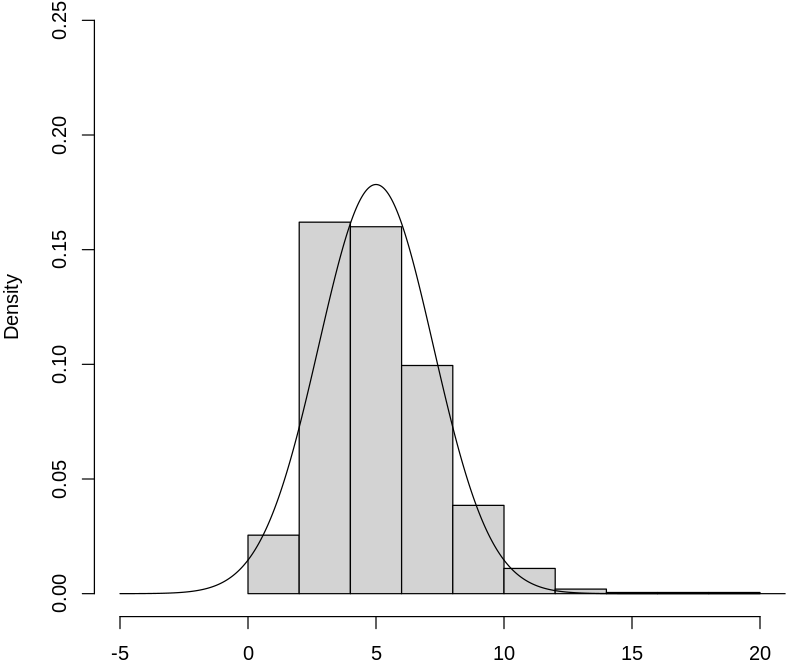


b) **Write Up Only**: Then answer, do the 1000 averages still seem to obey the CLT?




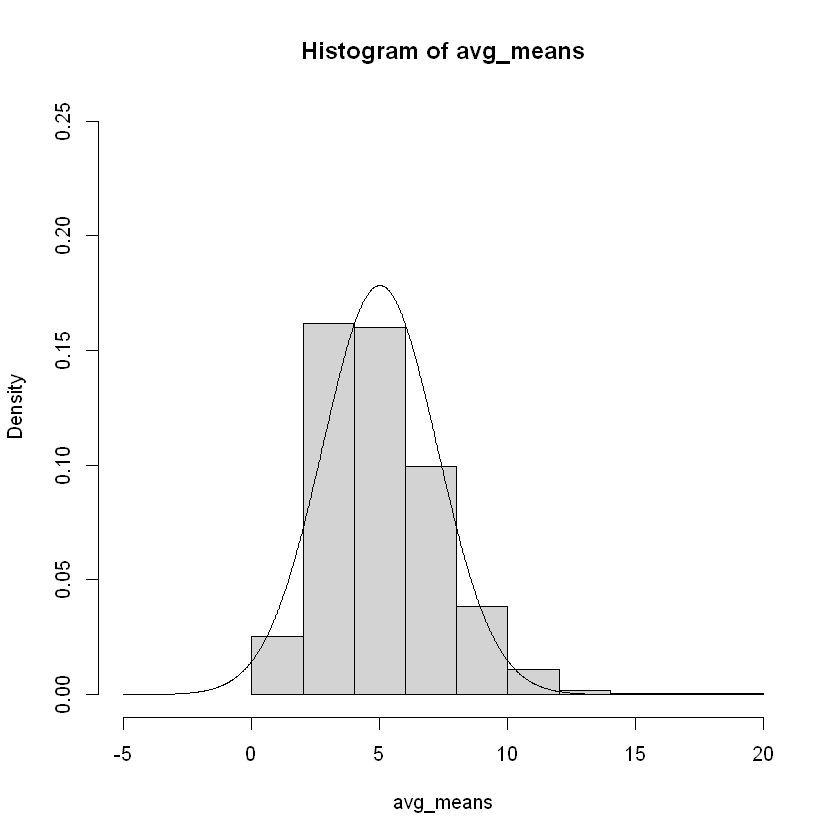

In [ ]:
#parameter settings
set.seed(1)
simulations=1000
sample_size=5
rate=0.2
avg_means= rep(NA,simulations=1000)

#1000 simulations for sample size 5 from exp dbn
for( simulation in 1:simulations){
    #generate sample
    sample= rexp(sample_size,rate)
    avg_means[simulation]=mean(sample)
    }

#therotical mean and sd of sample mean
avg_exp_rate= 1/rate
exp_sd= sqrt((1/rate)^2/sample_size)

#plot histogram and curve
hist(avg_means,prob=TRUE,ylim=c(0,0.25),xlim=c(-5,20))
x=seq(from=-5,to=20,length=1000)
lines(x,dnorm(x, mean=avg_exp_rate, sd=exp_sd))

Though there are small deviations between histogram of means and theoritical mean curve, particulary on the tails. Overall shape and distribution is more towards a normal distribution confirming the averages still obey CLT. These deviations particularly could be beacuse of sample size, but with 1000 simulations, means of exponential distribution are following normal distribution. If we increase in sample size, we see a closer dit to normal distribution.

c) **Code Up & Explain in Video**: The CLT also doesn't say anything about the median but we can use simulations to explore its properties. Again modify what we did in class but explore the results of drawing a sample size of 100 points from an exponential distribution with rate .2. This time look at the histogram of 1000 medians rather than 1000 means. Again, plot the CLT theorem curve (as it applies to the mean) over it.

** Hint.** As a test case, if you run `set.seed(1)` before you draw your samples, you should get this as your histogram:
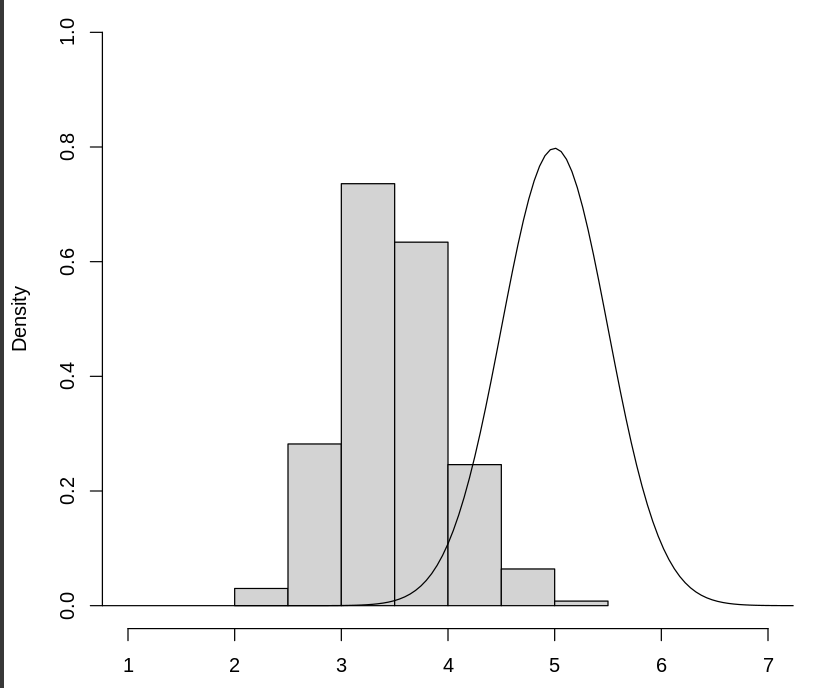


d)  **Write Up Only**: From part (c) , what do your results seem to suggest about the distributional properties for the median with respect to the CLT?

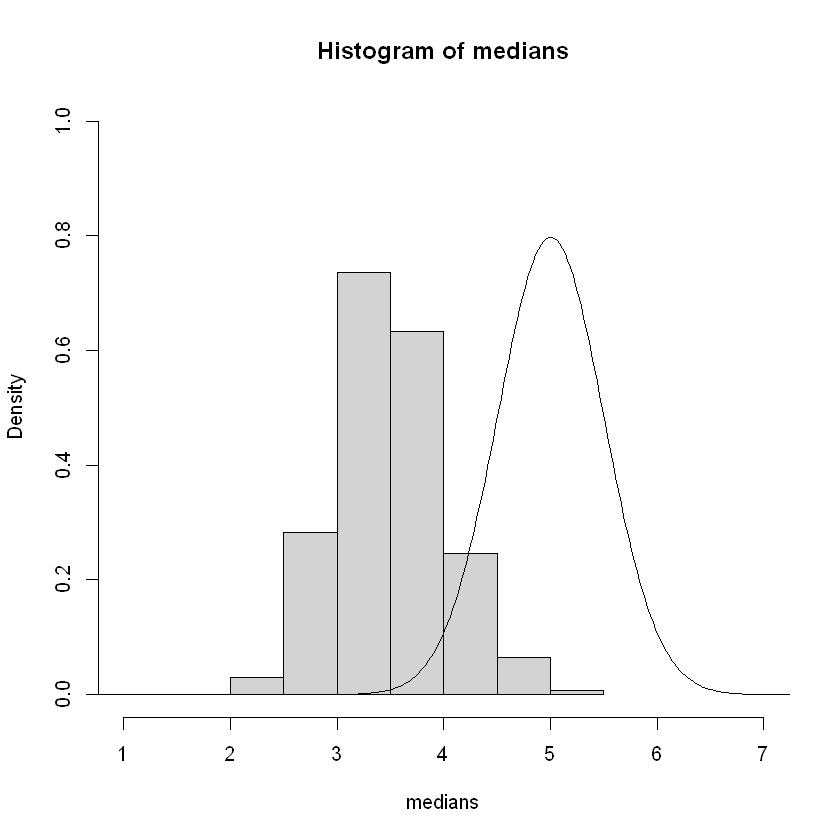

In [ ]:
#parameter settings
set.seed(1)
simulations=1000
sample_size=100
rate=0.2
medians= rep(NA,simulations=1000)
#1000 simulations for sample size 5 from exp dbn
for( simulation in 1:simulations){
    #generate exp sample
    sample= rexp(sample_size,rate)
    medians[simulation]=median(sample)
    }

#therotical mean and sd of sample mean
avg_exp_rate= 1/rate
exp_sd= sqrt((1/rate)^2/sample_size)
hist(medians,prob=TRUE,ylim=c(0,1),xlim=c(1,7))
x=seq(from=-5,to=20,length=1000)
lines(x,dnorm(x, mean=avg_exp_rate, sd=exp_sd))

Theoritical normal distributon doesn't fit the distribution of medians, hence CLT doesn't apply as strongly to the medians as it does with means even with larger sample size.

### Exercise 3

We saw a problem where 5 students sat in a room that was scaled to the unit square. Now consider a situation where 10 students are sitting in a rectangular room, but their positions can only take on discrete values because they sit in chairs which are arranged in rows and columns. The seats are in rows 1, 2, ..., 6 and columns 1, 2, ..., 5.  The students are sitting in the seats located at the following pairs of (row, column):

(1, 3); (1, 4); (1; 5);

(2, 3);

(4, 2); (4, 4); (4, 5);

(5, 1); (5, 2);

(6, 3)

#### a) **Code Up & Explain in Video**: Create a simulation with 1000 runs to conduct a one-sided hypothesis test about how students are sitting around the classroom. For simplicity, don't worry about the fact that two students cannot sit in the same spot. Your simulation should have two outputs: a histogram of your simulated distance values with a vertical line through it that represents the statistic for the actual data; and the approximate p-value that we would see data as extreme as this data (one sided test) if the students really were sitting randomly, independently discretely uniformly around the classroom. In your explanation of your code, make sure you justify which direction you test in for your video.

**Hint.** To help you make sure your code is right, as a test case: If you use `set.seed(1)` at the beginning of your code before you do any random draws, you should get this output for your histogram.
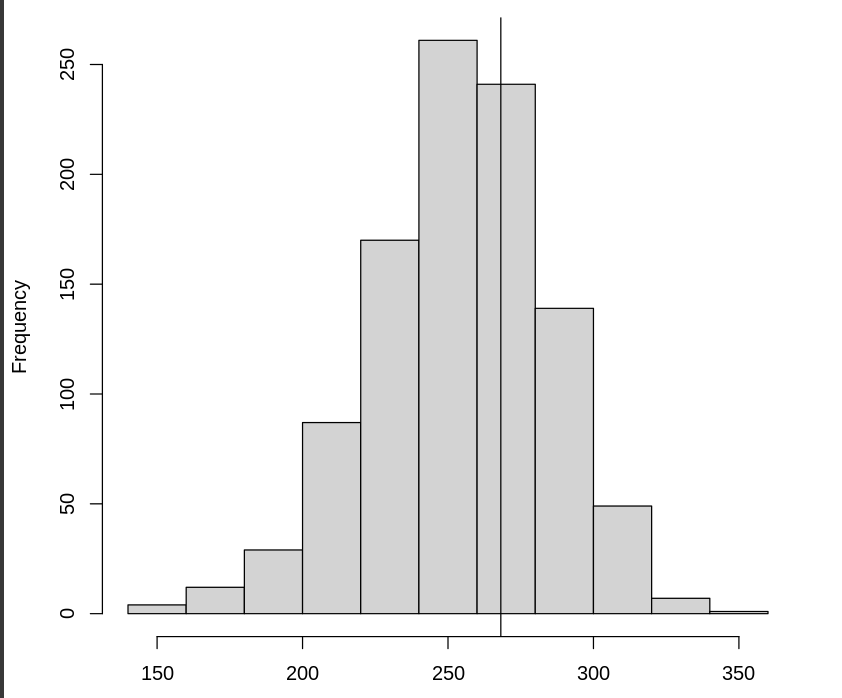

#### b) **Write Up Only**: Then answer: what is your conclusion about how students sat in class? Use hypothesis testing at the $\alpha=.05$ level.



[1] "The p-value is: 0.317"


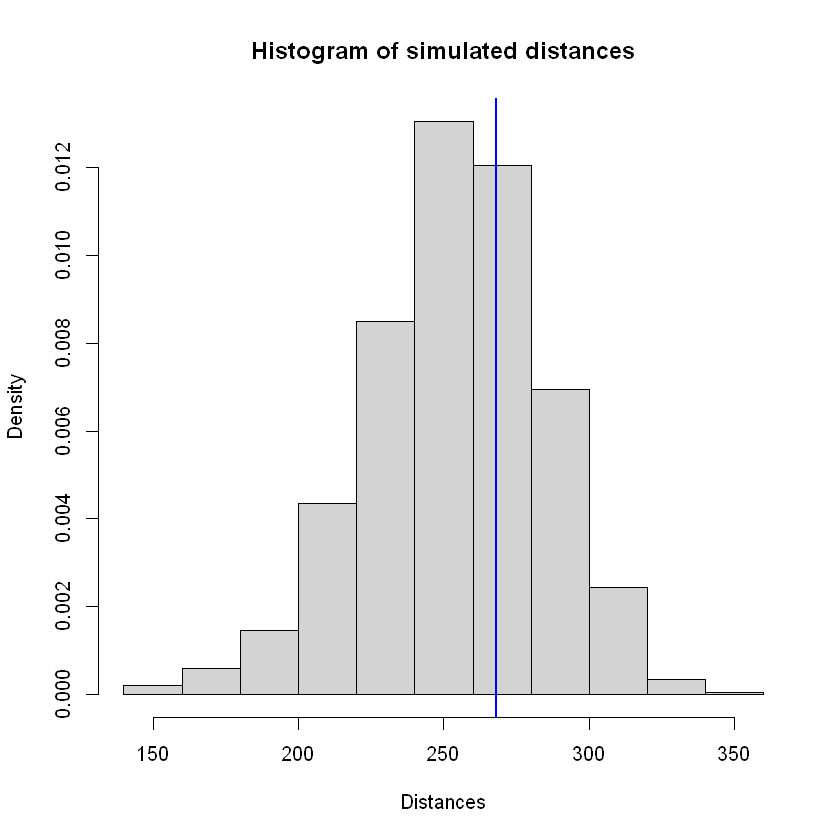

In [ ]:
#Given Actual Dta
# Create two arrays, one for x-coordinates and one for y-coordinates
x_coords <- c(1, 1, 1, 2, 4, 4, 4, 5, 5, 6)
y_coords <- c(3, 4, 5, 3, 2, 4, 5, 1, 2, 3)
student_pairs=10

point_distances=function(x_sample,y_sample){
    e_dist=0
    for(i in 1:length(x_sample)){
      for(j in 1:length(y_sample)){
        e_dist = e_dist+ sqrt((x_sample[i]-x_sample[j])^2+(y_sample[i]-y_sample[j])^2)
          }
        }
    return (e_dist)
    }
actual_dist=point_distances(x_coords,y_coords)

set.seed(1)
#Simulation Settings
simulations= 1000
e_dist_vec= rep(NA,simulations)

for(run in 1:simulations){
    #generate sample with 10 pairs of coordinates
    x_sample=sample(c(1:6),student_pairs,replace=TRUE)
    y_sample=sample(c(1:5),student_pairs,replace=TRUE)
    e_dist_vec[run]=point_distances(x_sample,y_sample)
    }

# Calculate the p-value for a one-sided test (right tail)
p_value <- sum(e_dist_vec >= actual_dist) / simulations

# Print the p-value
print(paste("The p-value is:", p_value))

hist(e_dist_vec, prob = TRUE, xlab = "Distances",main="Histogram of simulated distances")
abline(v = actual_dist, col = "blue", lwd = 2)


Null Hypothesis (H0): Students are seated randomly and independently around the classroom.

Alternative Hypothesis (HA): The students' seating arrangement is not random.

test statistics= 268.16
p-value=0.317
alpha=0.05

As p-value > alpha, we fail to reject Null Hypothesis. Hence, there is no enough evidence to suggest that students are not seated randomly.

### Exercise 4: Performance of the Gini Index

Let $X$ be a non-negative random variance with $\mu=\mathbb{E}X <\infty$. For a random sample $x_1, \ldots, x_n$ from the distribution of $X$, the Gini ratio is defined by

$$
G = \frac{1}{2n^2\mu}\sum_{j=1}^{n}\sum_{i=1}^{n}|x_i-x_j|.
$$

The Gini ratio is a measure of income equality (used in Economics).

a) **Code Up & Explain in Video**: If the mean is unknown, let $\hat{G}$ be the statistic $G$ with $\mu$ replaced by $\bar{x}$. Estimate using 1000 samples (each sample size 100) the mean and standard error of $\hat{G}$ if $X$ is Uniform(0, 1).

b) **Code Up & Explain in Video**: Also estimate the mean and standard error using 1000 samples if $X$ is Bernoulli(0.1).

** Hint.** To check that your code is on the right track, as a test case, if you run `set.seed(1)` before you run your Bernoulli samples, the mean should be `0.331318360208928` and standard error should be `0.0235724481450571`.

c) **Write Up Only**: Then in a sentence or two, analyze what the means and standard errors tell you about the Gini index for these two distributions.

In [ ]:
#parameter settings
simulations=1000
sample_size=100

# compute the Gini coefficient
Gini <- function(sample) {
  n <- length(sample)
  sample_mean <- mean(sample)
  sorted_sample <- sort(sample)
  # Compute the Gini coefficient based on the formula provided
  Gini_sum <- 0
  for (i in 1:n) {
    Gini_sum <- Gini_sum + (2 * i - n - 1) * sorted_sample[i]
  }
  Gini_hat <- Gini_sum / (n^2 * sample_mean)
  return(Gini_hat)
}

set.seed(1)
gini_uniform=rep(NA,simulations)

for(run in 1:simulations){
    #generate uniform sample
    sample=runif(sample_size)
    gini_hat=Gini(sample)
    gini_uniform[run]=gini_hat
    }

mean_gini_uniform=mean(gini_uniform)
se_gini_uniform=sd(gini_uniform)/sqrt(simulations)
cat("ean Gini Uniform value:", mean_gini_uniform, "\n")
cat("Standard Error Gini Uniform value:", se_gini_uniform, "\n")

Mean_Gini_uniform value: 0.3322893 
se_Gini_uniform value: 0.0007626875 


In [ ]:
set.seed(1)
gini_bernoulli=rep(NA,simulations)
p=0.1
for(run in 1:simulations){
    #generate binomial sample
    sample=rbinom(sample_size, 1, p)
    gini_hat=Gini(sample)
    gini_bernoulli[run]=gini_hat
    }

mean_gini_bernoulli=mean(gini_bernoulli)
se_gini_bernoulli=sd(gini_bernoulli)/sqrt(simulations)
cat("Mean Gini Bernoulli value:", mean_gini_bernoulli, "\n")
cat("Standard Error Gini Bernoulli value:", se_gini_bernoulli, "\n")

Mean_Gini_uniform value: 0.89973 
se_Gini_uniform value: 0.0009471664 


Gini Coefficient ranges from 0(no inequality) to 1 (high inequality), Bernoulli distribution exhibits far greater inequality compared to the Uniform distribution, as reflected in their Gini index values, this could be because most values in bernoulli distributions are 0's with only a small probability of getting 1's. The small standard errors indicate that these estimates are stable and reliable.